In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray();

import h5py
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
cnn_outfile='../keras/model_predictions_50epoch.h5'
f=h5py.File(cnn_outfile,'r')

In [3]:
Y_pred=f['y_pred_test']
Y_test=f['y_test']
Y_pred_train=f['y_pred_train']
Y_train=f['y_train']
classes=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
from sklearn.metrics import accuracy_score
print 'Performance on Train set: %0.2f'% (accuracy_score(Y_train,Y_pred_train))

Performance on Train set: 0.81


Classification Statistics:
             precision    recall  f1-score   support

   airplane       0.81      0.78      0.80      1000
 automobile       0.90      0.88      0.89      1000
       bird       0.75      0.65      0.70      1000
        cat       0.60      0.67      0.63      1000
       deer       0.74      0.77      0.76      1000
        dog       0.81      0.62      0.70      1000
       frog       0.73      0.88      0.80      1000
      horse       0.79      0.86      0.82      1000
       ship       0.87      0.86      0.86      1000
      truck       0.86      0.86      0.86      1000

avg / total       0.79      0.78      0.78     10000



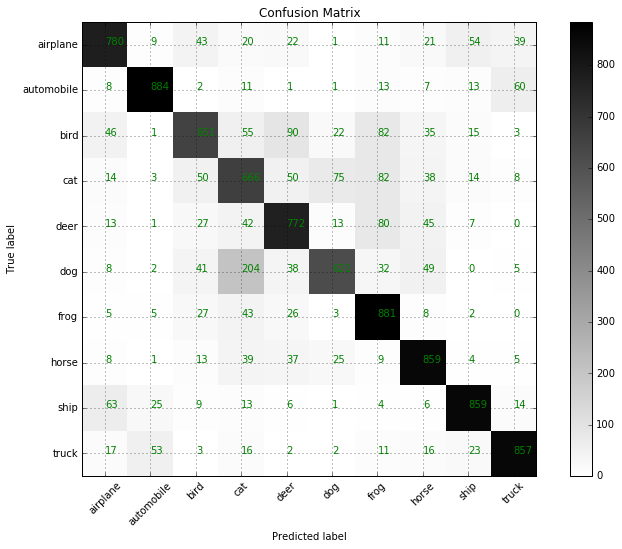

In [7]:
print 'Classification Statistics:'
print classification_report(Y_test,Y_pred,target_names=classes)

conf = confusion_matrix(Y_test, Y_pred)
plt.imshow(conf, cmap='binary',interpolation='nearest')
plt.title('Confusion Matrix'); plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45);plt.yticks(tick_marks, classes)
plt.tight_layout();plt.ylabel('True label');plt.xlabel('Predicted label')
font = {'color':  'green','stretch':'extra-expanded','weight':0,'size': 10}
for i,j in [(n,m) for n in range(len(classes)) for m in range(len(classes))]:
    plt.text(j,i,str(conf[i,j]),font)